# Plotting communities

Communities are created in Neo4j using various communit detection algorithms. The results of these algorithms are stored in the database as a property of the nodes. This notebook shows how to plot these communities using the Neo4j graph algorithms library.

In [1]:
from databaseconnection import DatabaseConnection
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

gds = DatabaseConnection().get_database_connection()
gds.version()


'2.3.2'

### Query data from Neo4j

First we need to connect to the Neo4j database and query the data we want to plot. The data will be stored in a pandas dataframe.

In [2]:
students = gds.run_cypher("MATCH (student:Student) RETURN student")["student"]

print("Number of students: ", len(students))
print(students)

# Convert the respondents Series to a DataFrame
students_data = []
for student in students:
    students_data.append({'id': student['id'], 'schoolClimateNormalityIndex': student["schoolClimateNormalityIndex"], 'victimizationNormalityIndex': student["victimizationNormalityIndex"], 'louvainId_pos_prop': str(student["louvainId_pos_prop"]),
                          'lpaId_pos_prop': str(student['lpaId_pos_prop']), 'louvainId_similarity_pos_prop': str(student['louvainId_similarity_pos_prop']),
                          'lpaId_similarity_pos_prop': str(student['lpaId_similarity_pos_prop'])})

df = pd.DataFrame(students_data)

print(df)


Number of students:  3039
0       (normalityIndex, lpaId_similarity_pos_prop, sc...
1       (normalityIndex, lpaId_similarity_pos_prop, sc...
2       (normalityIndex, lpaId_similarity_pos_prop, sc...
3       (normalityIndex, lpaId_similarity_pos_prop, sc...
4       (normalityIndex, lpaId_similarity_pos_prop, sc...
                              ...                        
3034    (normalityIndex, lpaId_similarity_pos_prop, sc...
3035    (normalityIndex, lpaId_similarity_pos_prop, sc...
3036    (normalityIndex, lpaId_similarity_pos_prop, sc...
3037    (normalityIndex, lpaId_similarity_pos_prop, sc...
3038    (normalityIndex, lpaId_similarity_pos_prop, sc...
Name: student, Length: 3039, dtype: object
                                        id  schoolClimateNormalityIndex  \
0     8931d1bb-ecf8-4031-82c9-5de135419799                     0.464609   
1     60ff73a9-822e-439e-a47e-37e0a7621c1c                     0.433621   
2     adbd7cd8-d1a7-4058-9645-c0147709a04c                     0.267

### Plotting Louvain communities

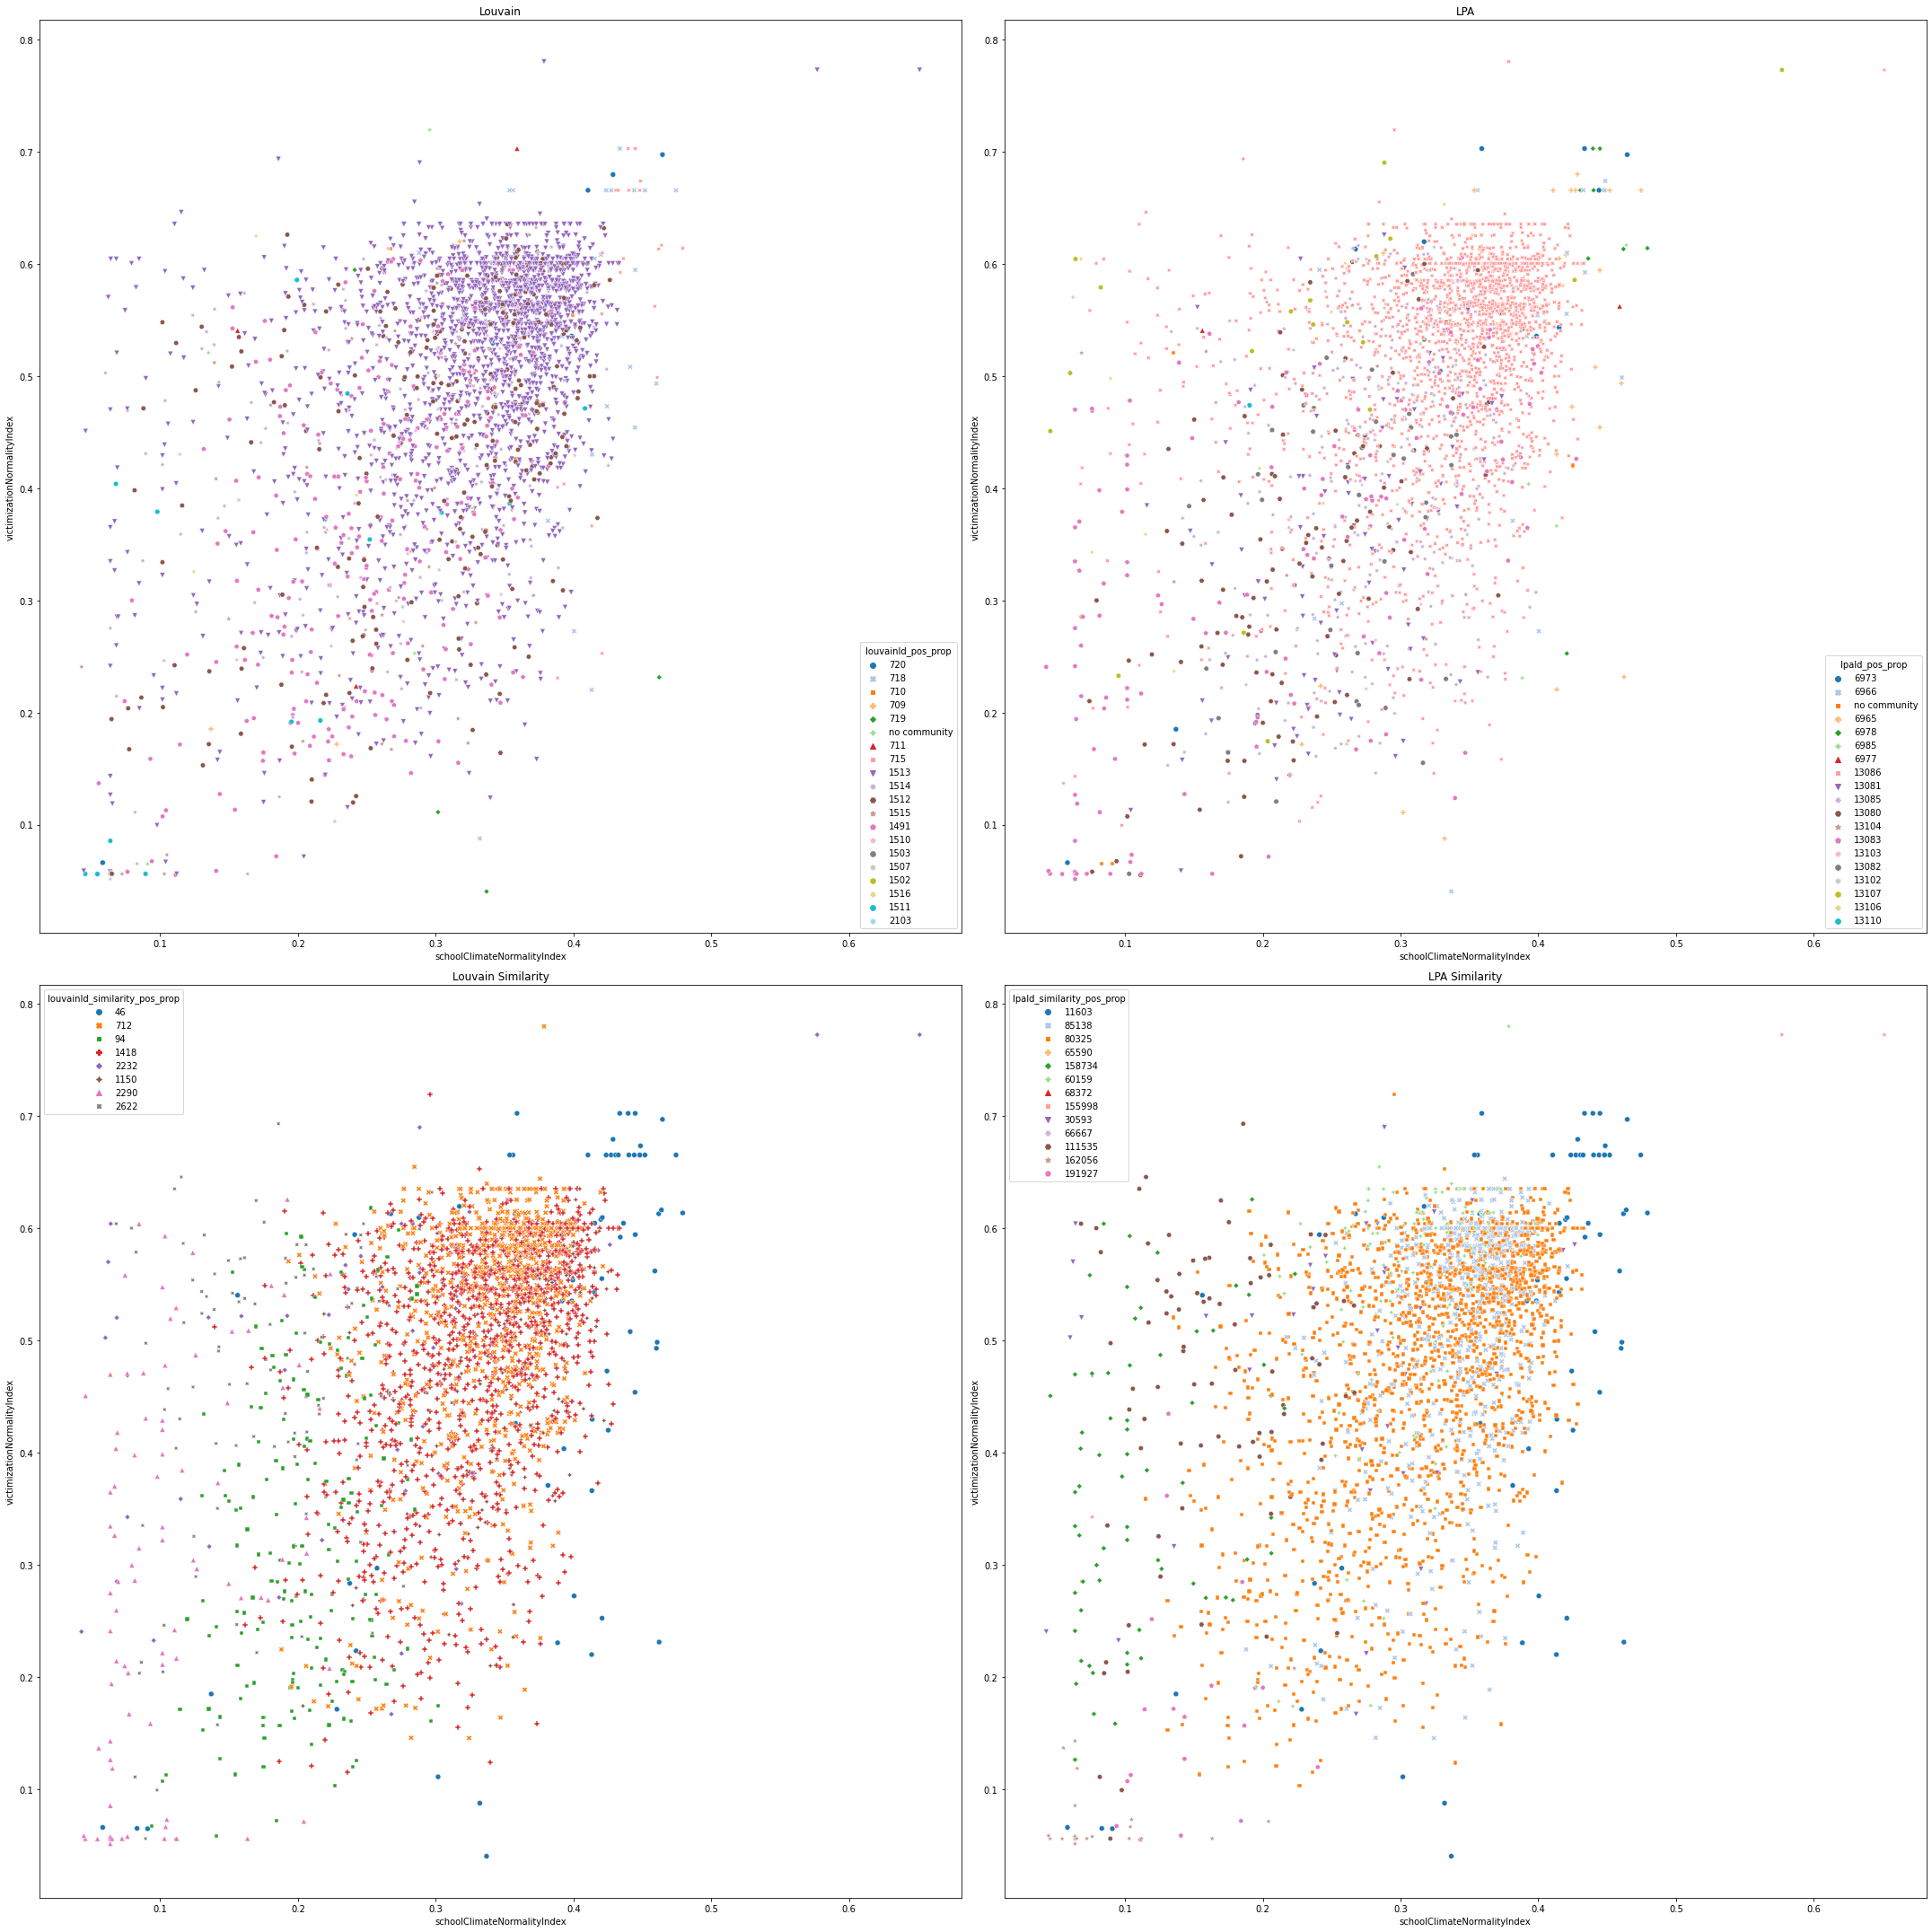

In [3]:

data = df


def create_new_community(data, community_column, min_community_size):
    # Get the number of students in each community
    community_sizes = data[community_column].value_counts()

    # Get the communities with less than 2 students
    small_communities = community_sizes[community_sizes < min_community_size]

    # Create a new community for all students in the small communities
    data.loc[data[community_column].isin(
        small_communities.index), community_column] = 'no community' if min_community_size == 2 else 'small community'

    return data


# Create a community for all students in communities with less than 2 students. Move all students in these communities to the new community. Do this for each of the three community detection algorithms.
# This is done to make the plot more readable.
data = create_new_community(data, 'louvainId_pos_prop', 2)
data = create_new_community(data, 'lpaId_pos_prop', 2)
data = create_new_community(data, 'louvainId_similarity_pos_prop', 2)
data = create_new_community(data, 'lpaId_similarity_pos_prop', 2)

# Remove `no community` from `louvainId_similarity_pos_prop` and `lpaId_similarity_pos_prop`
data = data[data['louvainId_similarity_pos_prop'] != 'no community']
data = data[data['lpaId_similarity_pos_prop'] != 'no community']

# Set up a 4x4 grid for your visualizations
SIZE = 15
# Set up the grid layout
fig, axes = plt.subplots(2, 2, figsize=(2 * SIZE, 2 * SIZE))

# Scatter plot of the schoolClimateNormalityIndex and victimizationNormalityIndex. Use the community to color the points. Create a legend and title.
sns.scatterplot(ax=axes[0, 0], data=data, x='schoolClimateNormalityIndex', y='victimizationNormalityIndex',
                hue='louvainId_pos_prop', style='louvainId_pos_prop', legend='full', palette='tab20').set_title('Louvain')
sns.scatterplot(ax=axes[0, 1], data=data, x='schoolClimateNormalityIndex', y='victimizationNormalityIndex',
                hue='lpaId_pos_prop', style='lpaId_pos_prop', legend='full', palette='tab20').set_title('LPA')
sns.scatterplot(ax=axes[1, 0], data=data, x='schoolClimateNormalityIndex', y='victimizationNormalityIndex',
                hue='louvainId_similarity_pos_prop', style='louvainId_similarity_pos_prop', legend='full', palette='tab10').set_title('Louvain Similarity')
sns.scatterplot(ax=axes[1, 1], data=data, x='schoolClimateNormalityIndex', y='victimizationNormalityIndex',
                hue='lpaId_similarity_pos_prop', style='lpaId_similarity_pos_prop', legend='full', palette='tab20').set_title('LPA Similarity')


# sns.pairplot(data=data, hue='louvainId_similarity_pos_prop', palette='tab10')
# Adjust the layout and show the plots
plt.tight_layout()
plt.show()


## Jointplot

/home/work/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/home/work/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)
/home/work/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


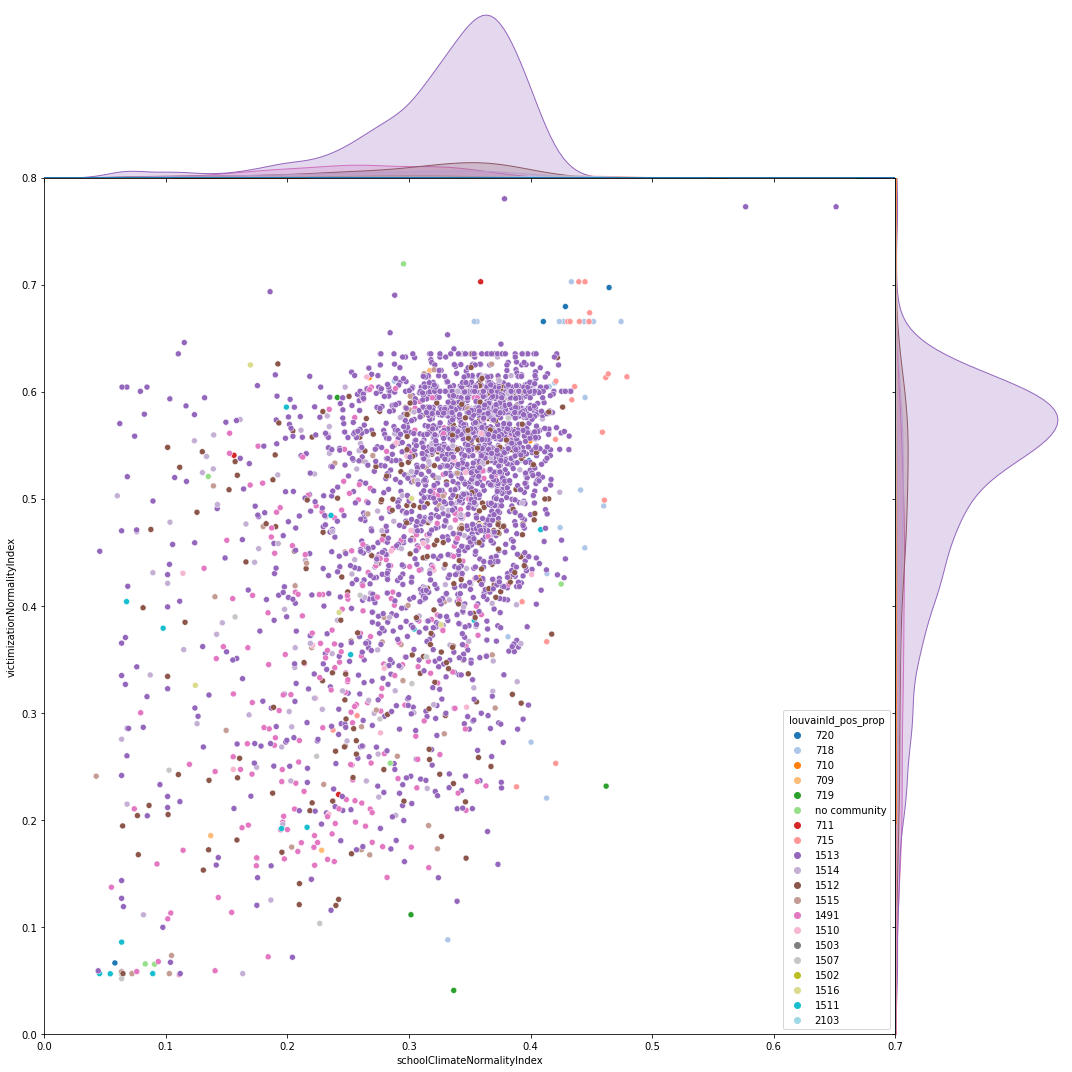

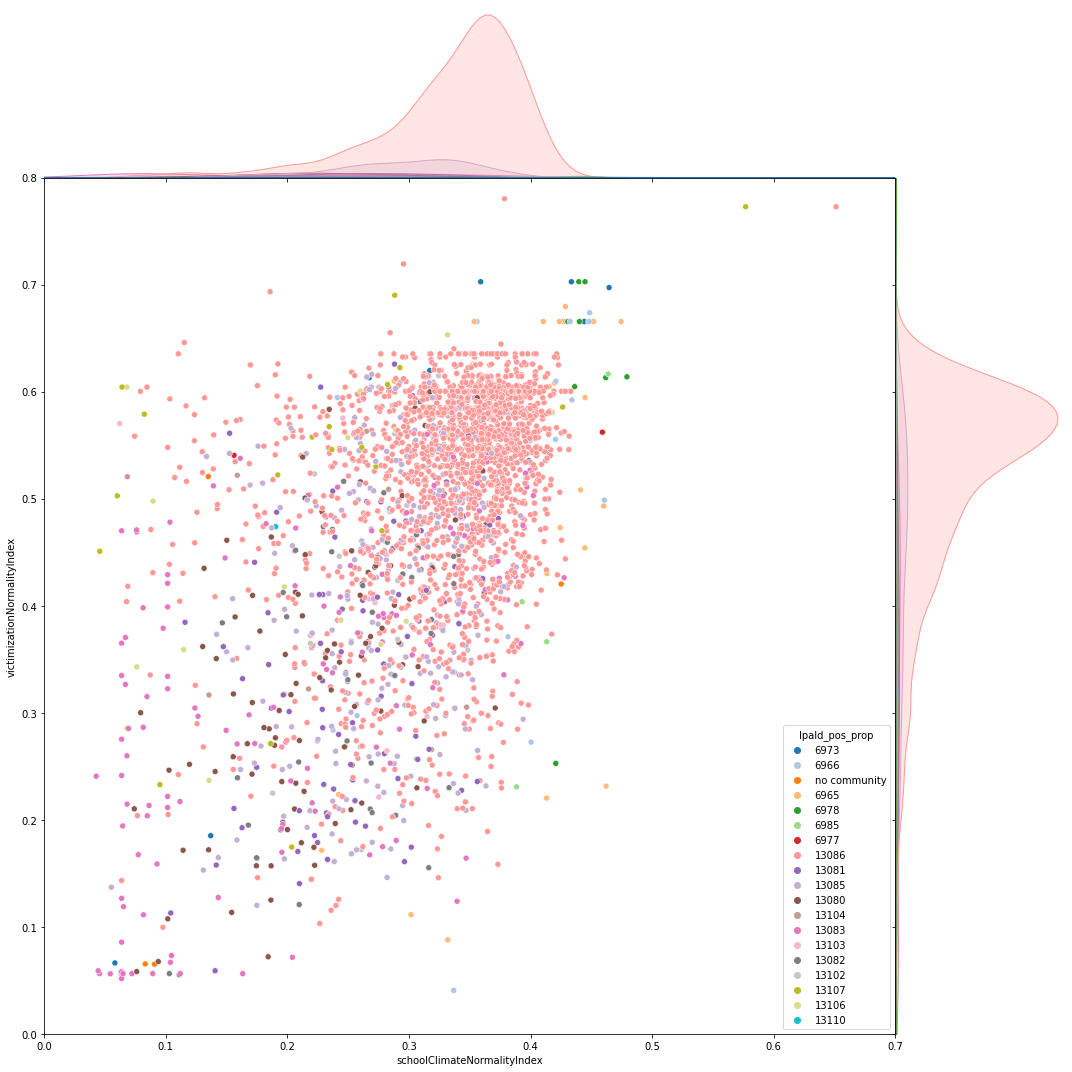

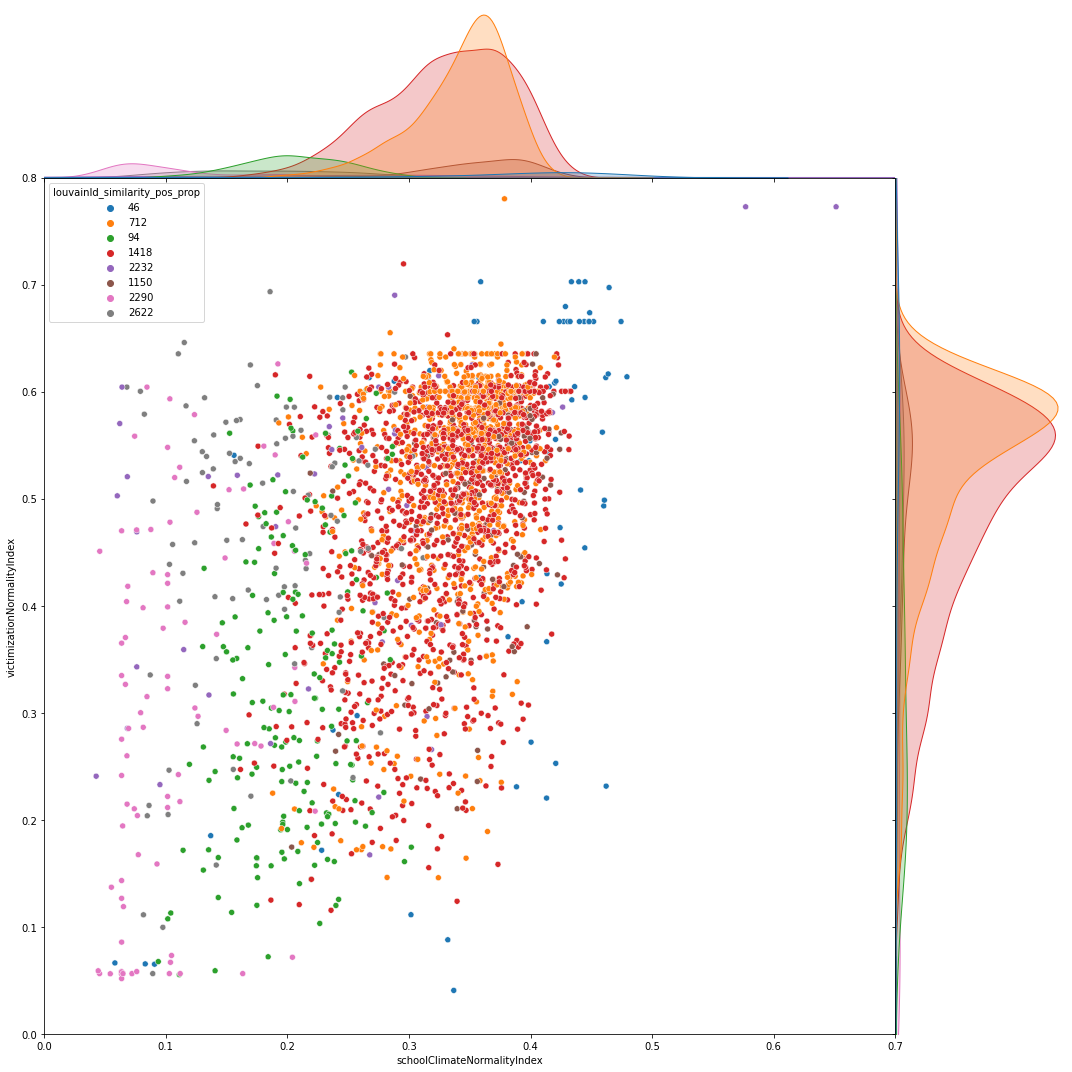

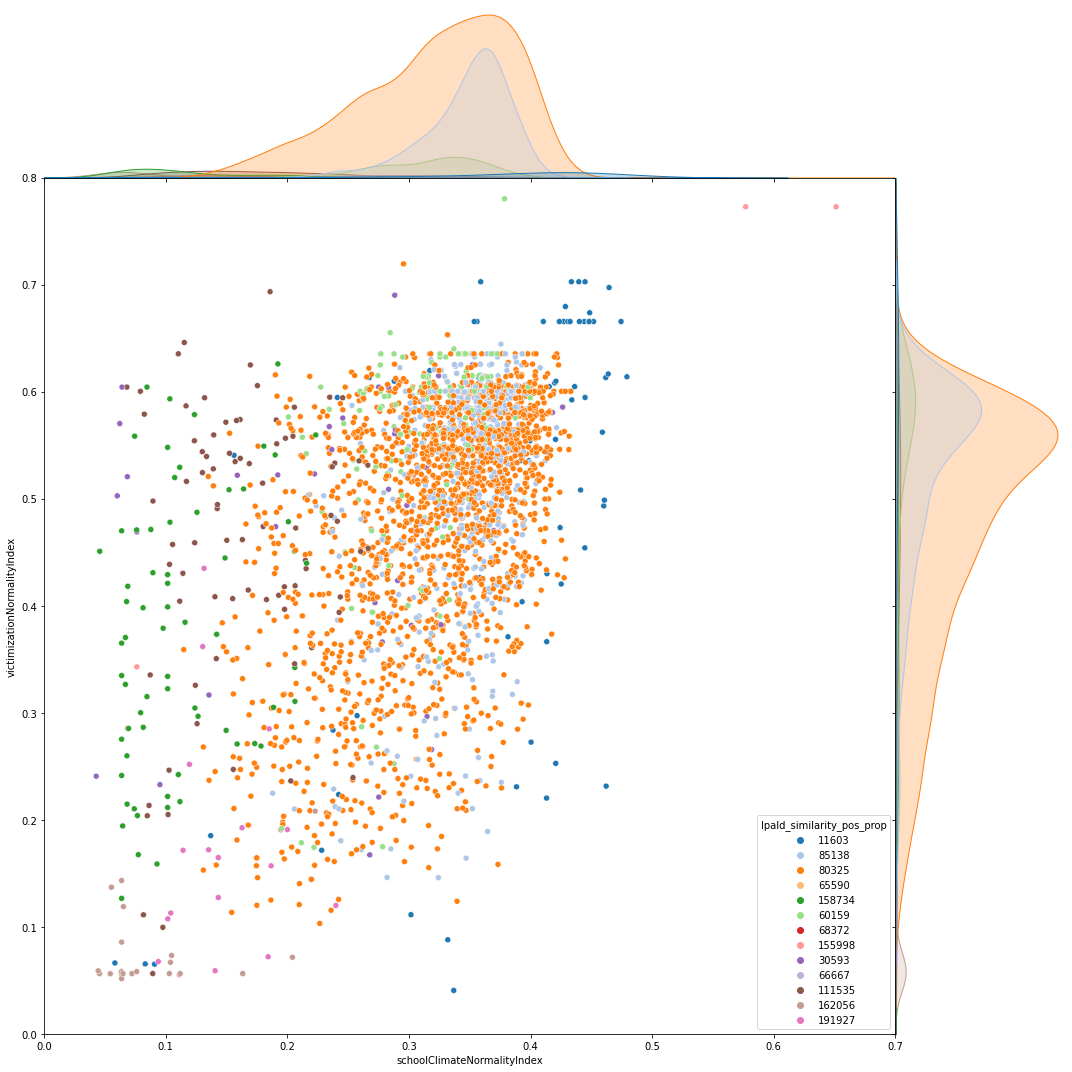

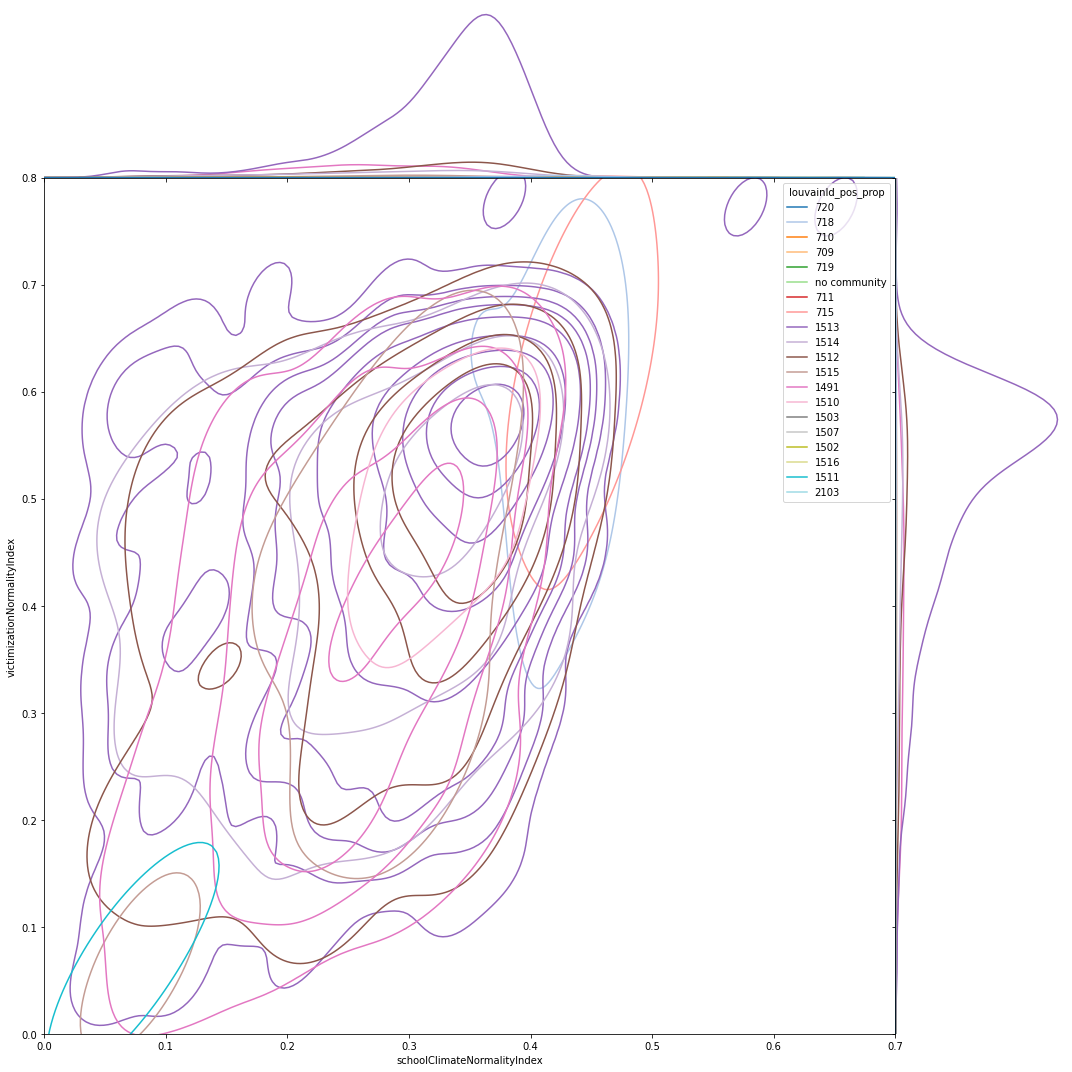

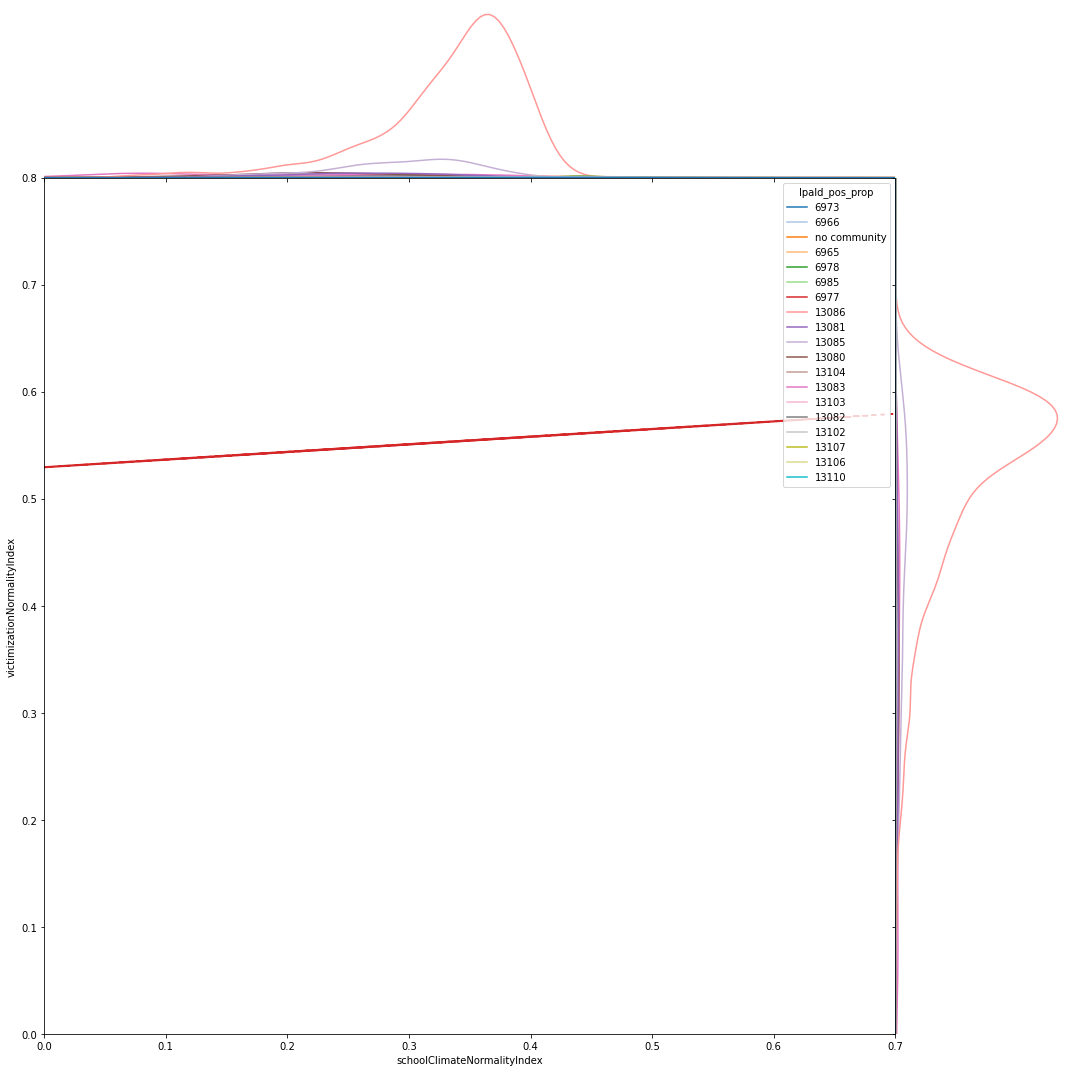

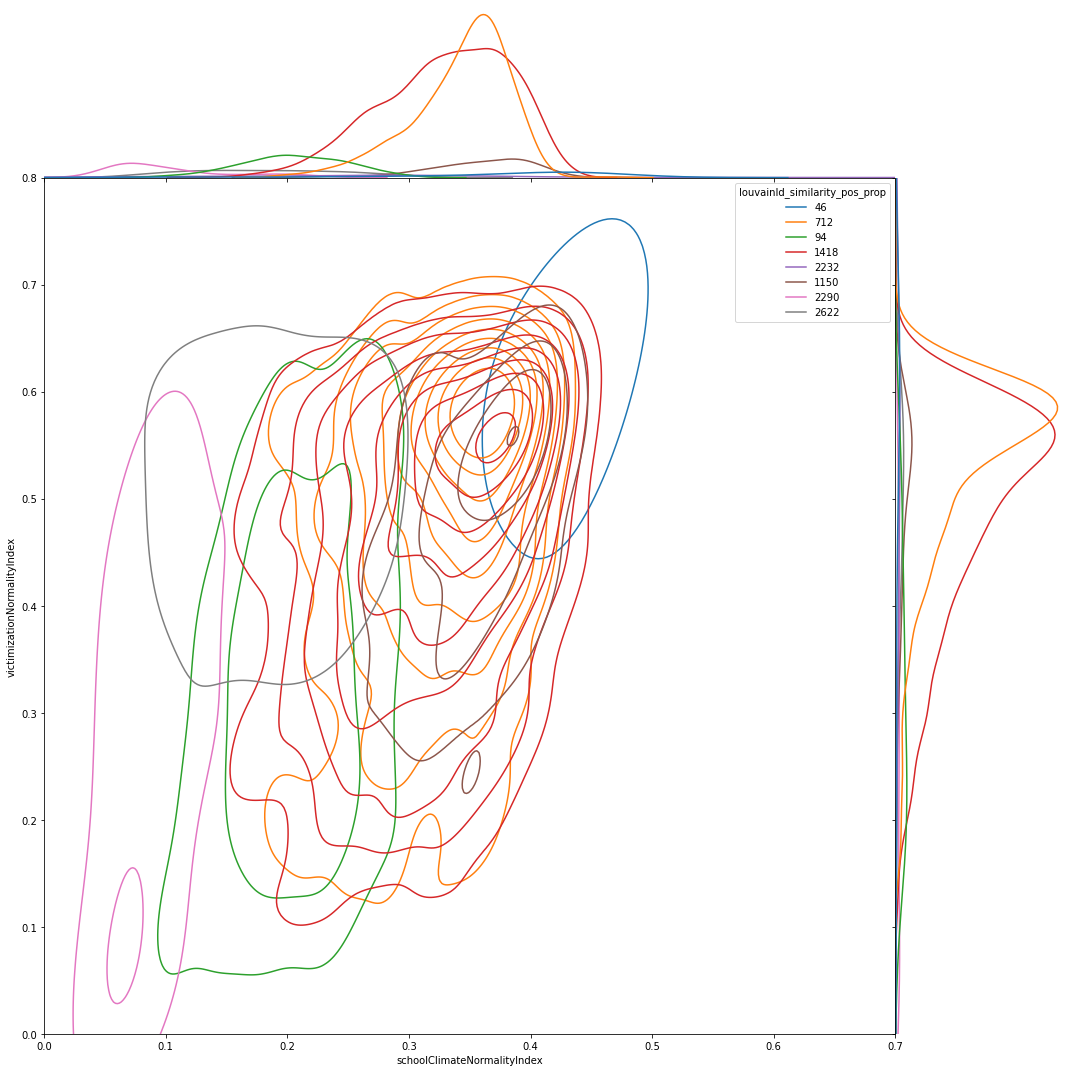

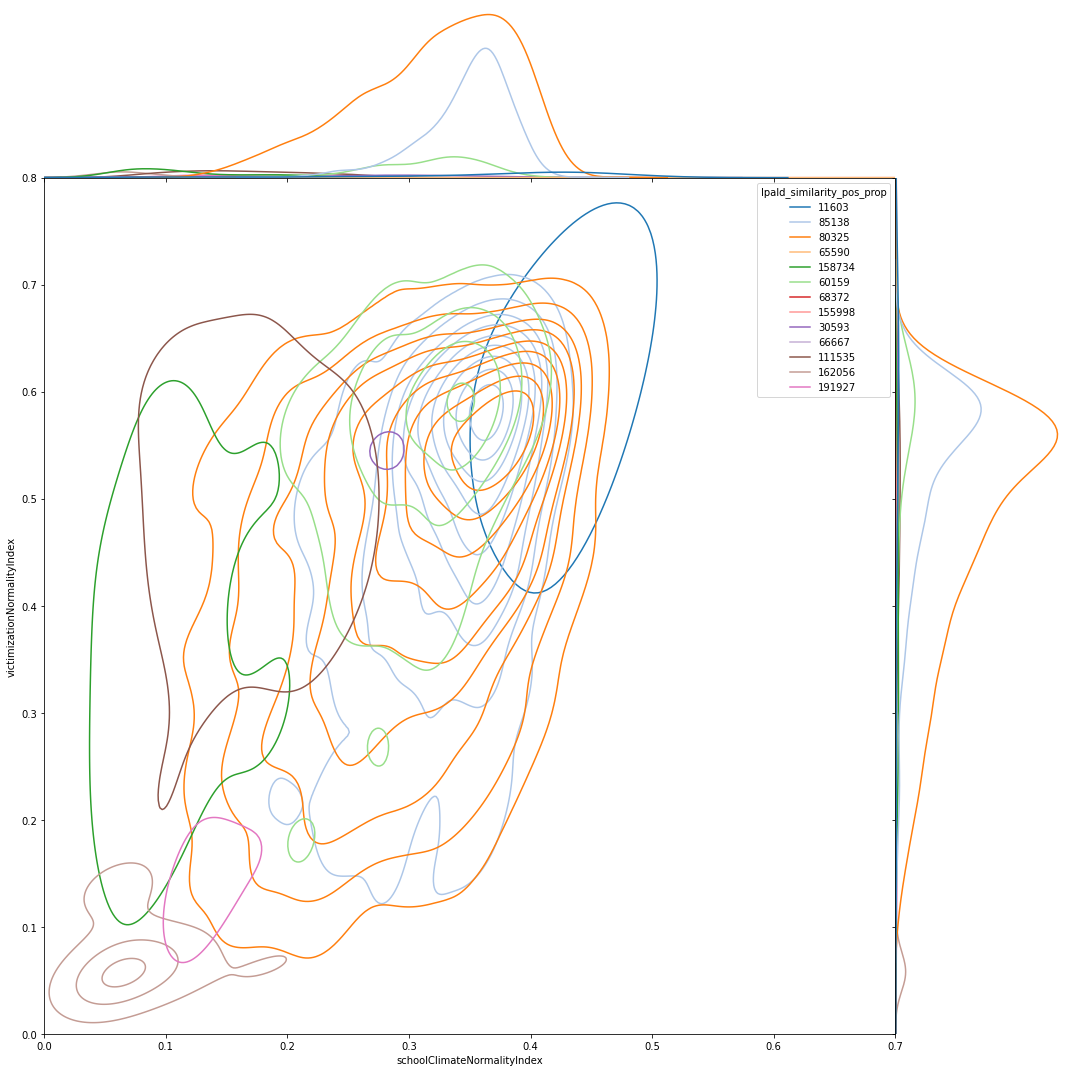

In [66]:


sns.jointplot(data=data, x='schoolClimateNormalityIndex', y='victimizationNormalityIndex',
                hue='louvainId_pos_prop', palette='tab20', height=15, space=0, xlim=(0, 0.7), ylim=(0, 0.8))
sns.jointplot(data=data, x='schoolClimateNormalityIndex', y='victimizationNormalityIndex',
                hue='lpaId_pos_prop', palette='tab20', height=15, space=0, xlim=(0, 0.7), ylim=(0, 0.8))
sns.jointplot(data=data, x='schoolClimateNormalityIndex', y='victimizationNormalityIndex',
              hue='louvainId_similarity_pos_prop', palette='tab10', height=15, space=0, xlim=(0, 0.7), ylim=(0, 0.8))
sns.jointplot(data=data, x='schoolClimateNormalityIndex', y='victimizationNormalityIndex',
                hue='lpaId_similarity_pos_prop', palette='tab20', height=15, space=0, xlim=(0, 0.7), ylim=(0, 0.8))


# KDE
sns.jointplot(data=data, x='schoolClimateNormalityIndex', y='victimizationNormalityIndex',
                hue='louvainId_pos_prop', palette='tab20', height=15, space=0, xlim=(0, 0.7), ylim=(0, 0.8), kind='kde')
sns.jointplot(data=data, x='schoolClimateNormalityIndex', y='victimizationNormalityIndex',
                hue='lpaId_pos_prop', palette='tab20', height=15, space=0, xlim=(0, 0.7), ylim=(0, 0.8), kind='kde')
sns.jointplot(data=data, x='schoolClimateNormalityIndex', y='victimizationNormalityIndex',
              hue='louvainId_similarity_pos_prop', palette='tab10', height=15, space=0, xlim=(0, 0.7), ylim=(0, 0.8), kind='kde')
sns.jointplot(data=data, x='schoolClimateNormalityIndex', y='victimizationNormalityIndex',
                hue='lpaId_similarity_pos_prop', palette='tab20', height=15, space=0, xlim=(0, 0.7), ylim=(0, 0.8), kind='kde')



## Pairgrid

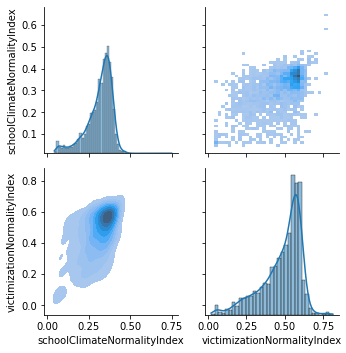

In [69]:

g = sns.PairGrid(data)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

## Catplot Swarm

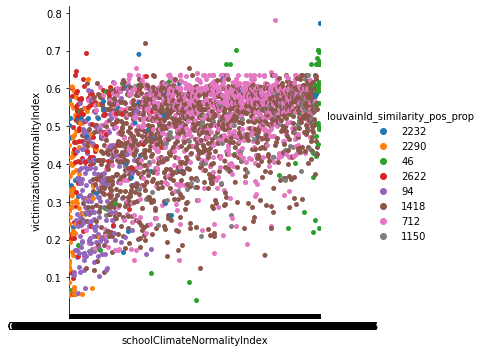

In [70]:
sns.catplot(data=data, x='schoolClimateNormalityIndex', y='victimizationNormalityIndex',
            hue='louvainId_similarity_pos_prop', legend='full', palette='tab10')

## Lmplot

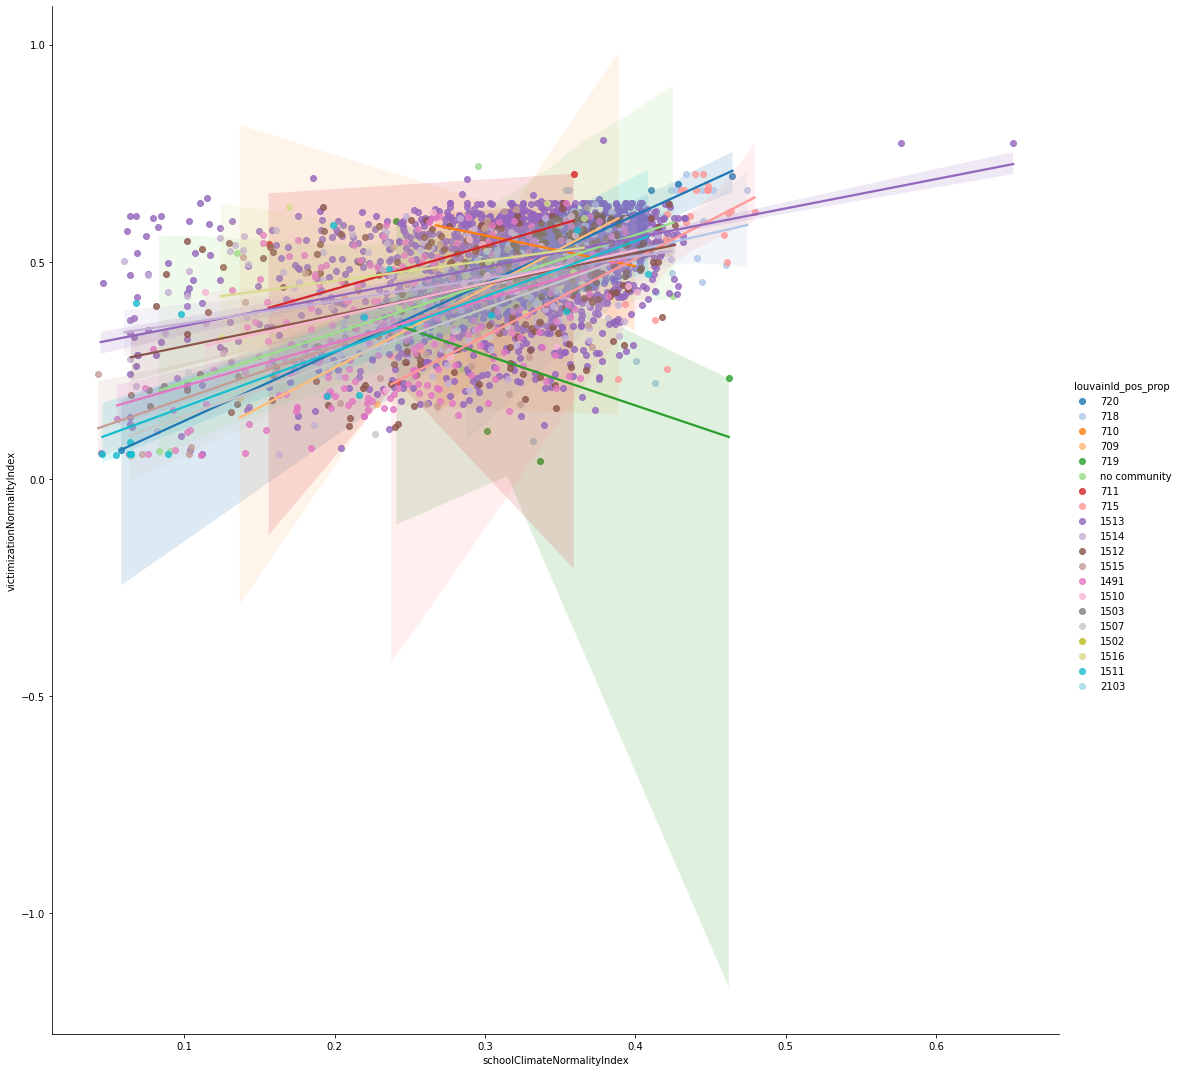

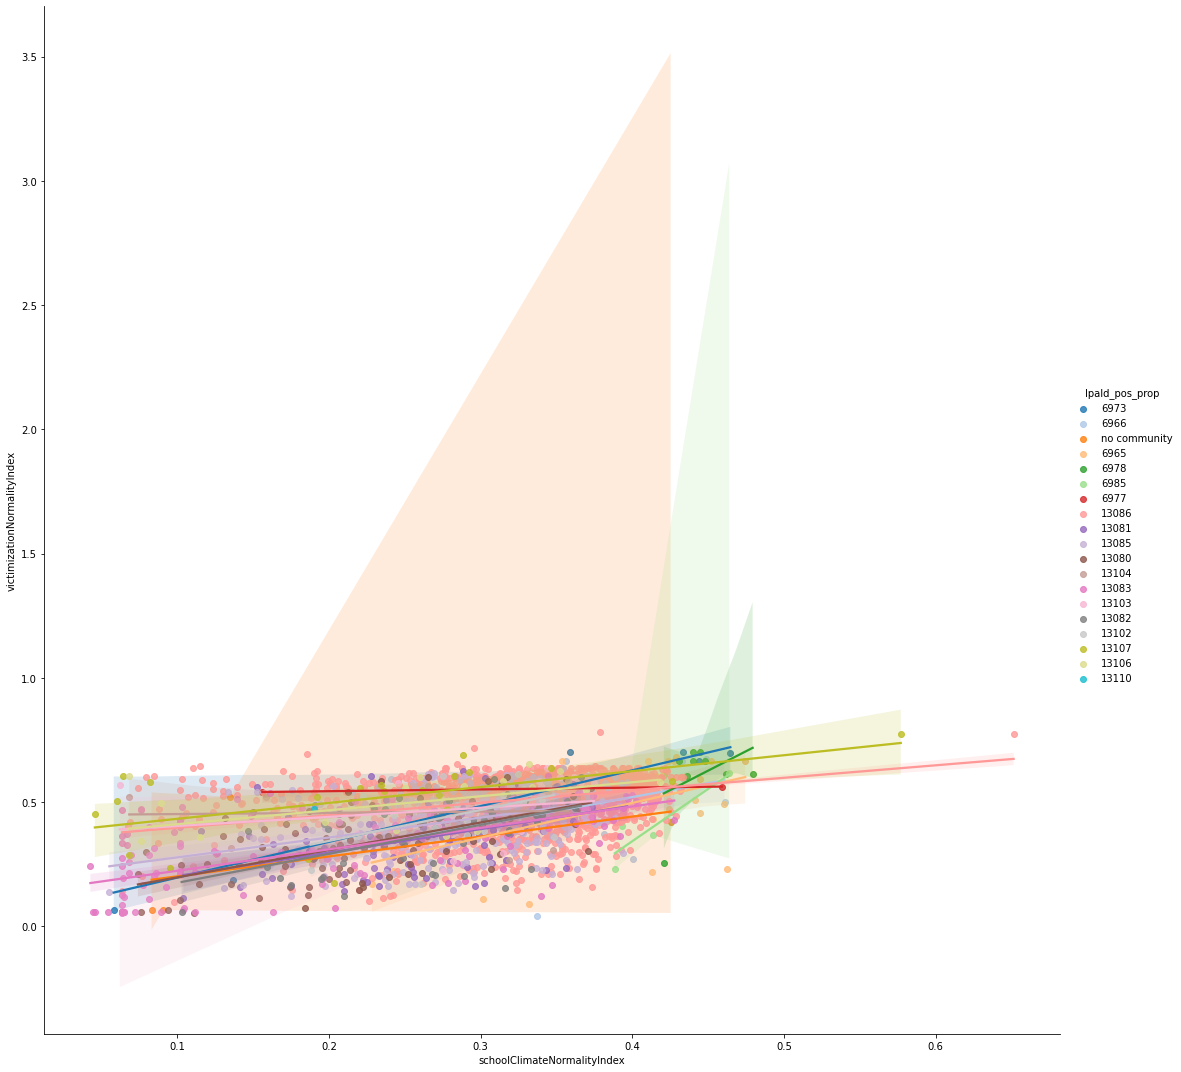

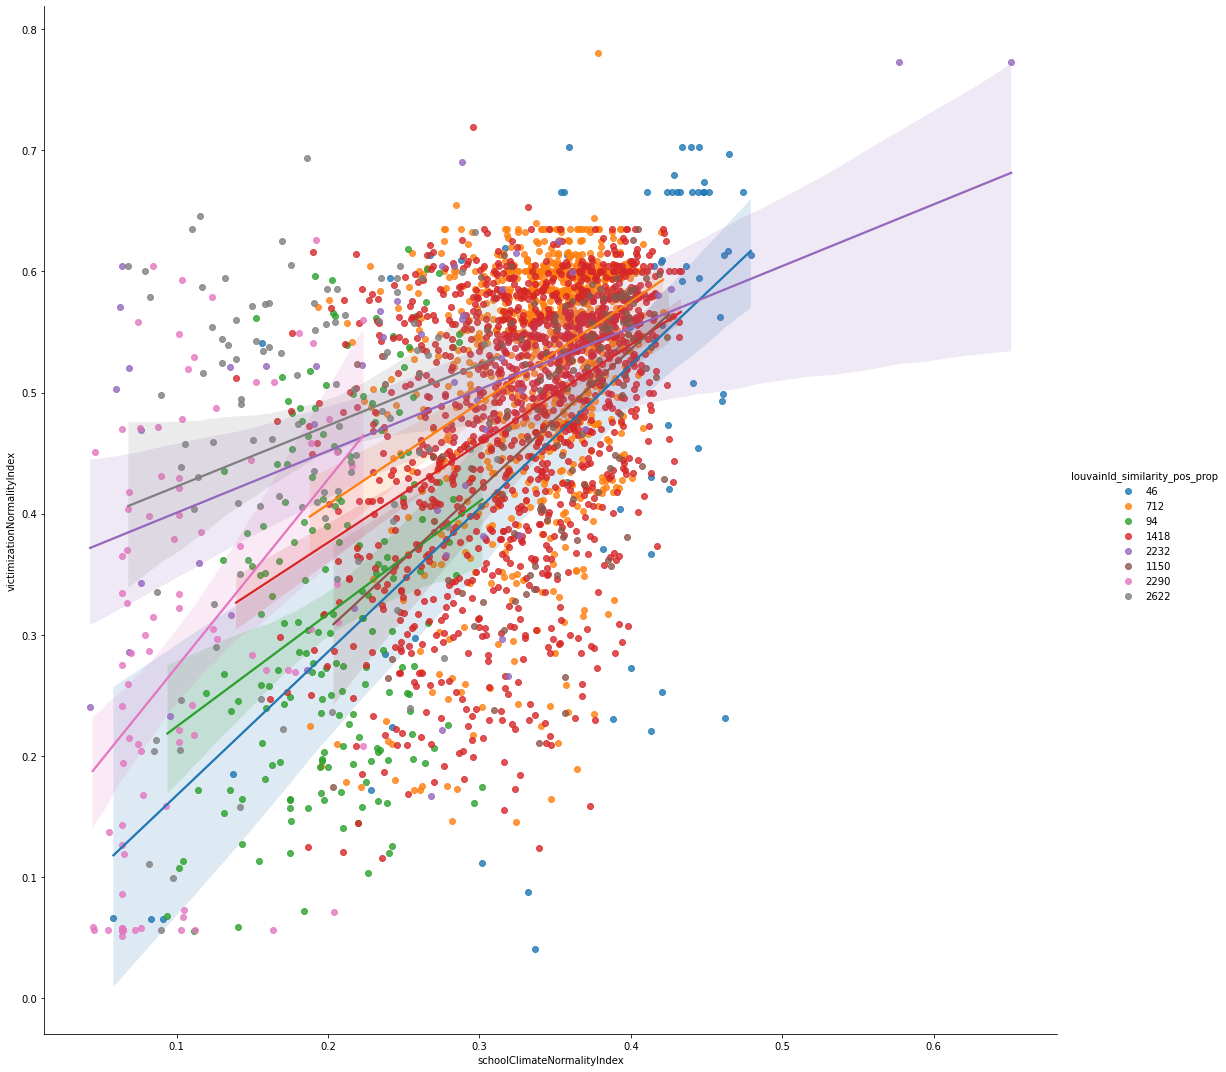

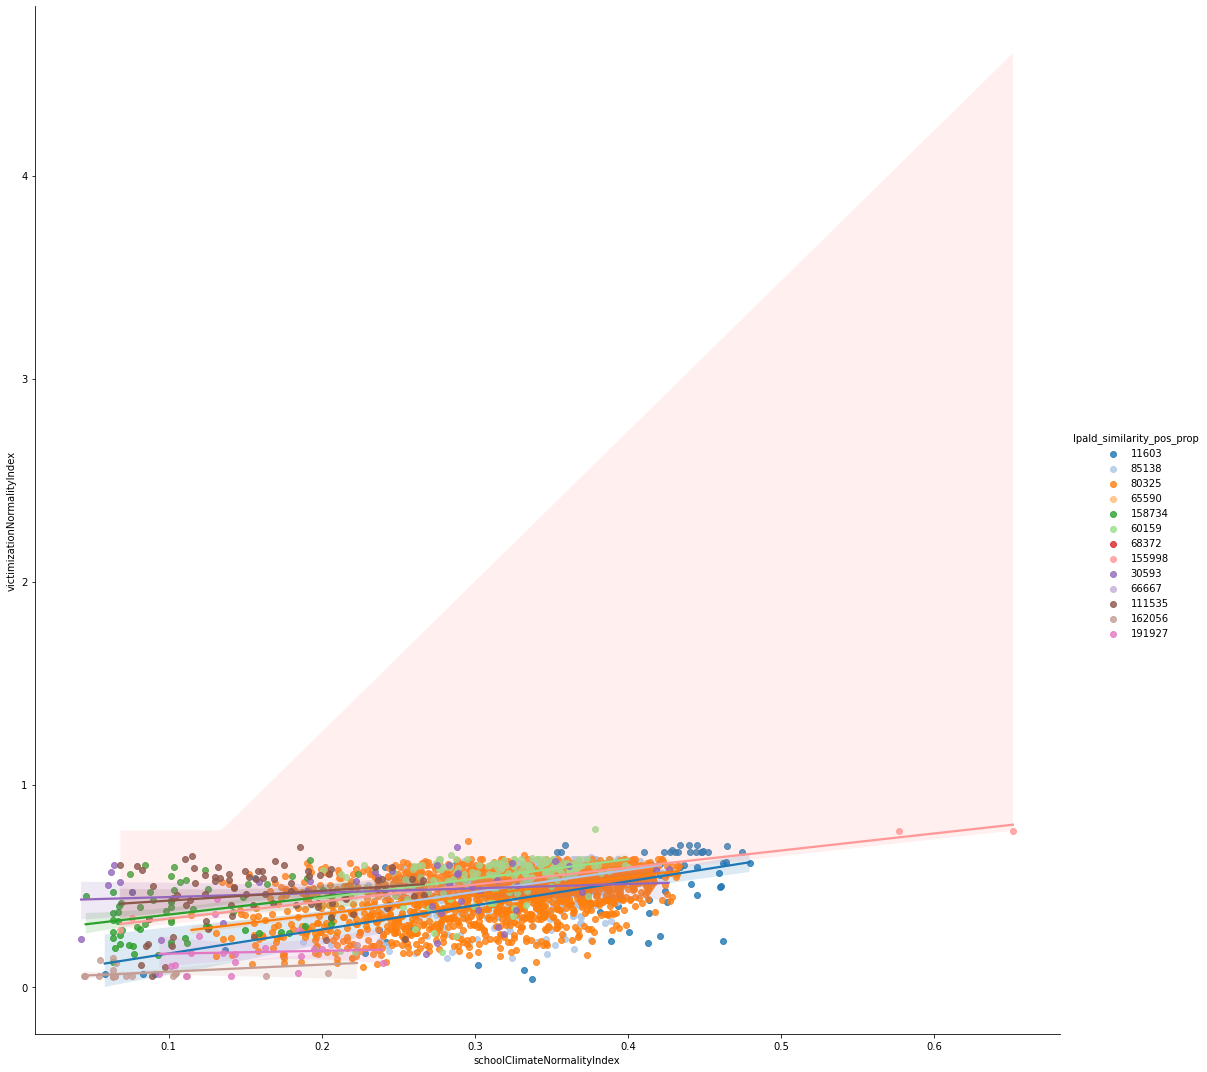

In [58]:
sns.lmplot(data=data, x='schoolClimateNormalityIndex', y='victimizationNormalityIndex',
           hue='louvainId_pos_prop',  legend='full', palette='tab20', height=15)
sns.lmplot(data=data, x='schoolClimateNormalityIndex', y='victimizationNormalityIndex',
              hue='lpaId_pos_prop',  legend='full', palette='tab20', height=15)
sns.lmplot(data=data, x='schoolClimateNormalityIndex', y='victimizationNormalityIndex',
           hue='louvainId_similarity_pos_prop',  legend='full', palette='tab10', height=15)
sns.lmplot(data=data, x='schoolClimateNormalityIndex', y='victimizationNormalityIndex',
              hue='lpaId_similarity_pos_prop', palette='tab20', height=15, legend='full')

## Pairgrid, scatter, kdeplot, kdeplot

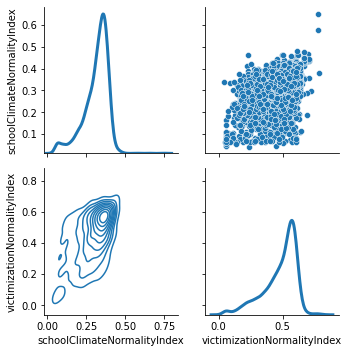

In [31]:
g = sns.PairGrid(data)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

## Pairplot

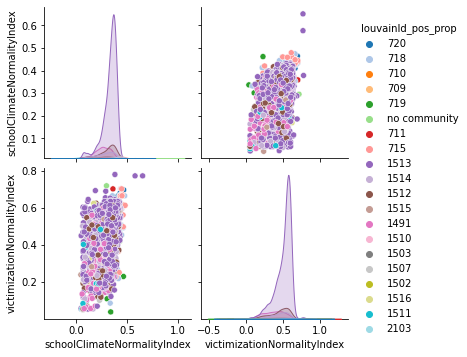

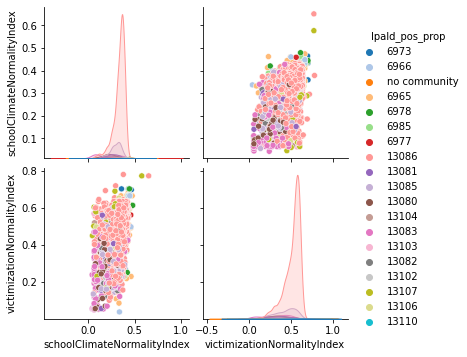

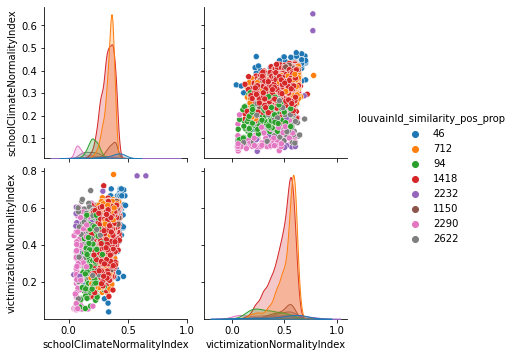

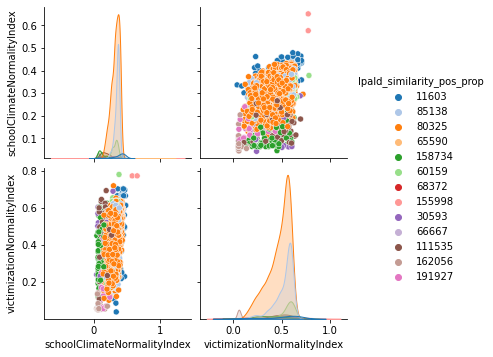

In [36]:
sns.pairplot(data=data, hue='louvainId_pos_prop', palette='tab20')
sns.pairplot(data=data, hue='lpaId_pos_prop', palette='tab20')
sns.pairplot(data=data, hue='louvainId_similarity_pos_prop', palette='tab10')
sns.pairplot(data=data, hue='lpaId_similarity_pos_prop', palette='tab20')

## Export resutls to spreadsheet

In [78]:
# Export the communities to the spreadsheet results/spreadsheet_bjorn.xlsx. 
# The spreadsheet already contains sheets `Respondent` and `Question`.
# `Respondent` contains columns `respondent.id` and `question.name` with values `questionAlternative.name` for each respondent.
# `Question` contains columns `question.name` and `questionAlternative.name` with values `respondent.id` for each question.
# The sheet was generated using the following code:
# # Create Respondent dataframe
# respondent_df = result.pivot_table(index='respondent.id', columns='question.name', values='questionAlternative.name', aggfunc='first').reset_index()
#
# # Create Question dataframe
# question_df = result[['question.id', 'question.name', 'questionAlternative.id', 'questionAlternative.name', 'questionAlternative.position']].drop_duplicates()
#
# # Export to Excel
# with pd.ExcelWriter('output.xlsx') as writer:
#     respondent_df.to_excel(writer, index=False, sheet_name='Respondent')
#     question_df.to_excel(writer, index=False, sheet_name='Question')

# Export the communities to the spreadsheet results/spreadsheet_bjorn.xlsx.
# One sheet for each Communit ID.
# Each sheet should contain columns `respondent.id`, `normalityIndex` and `question.name` with corresponding `questionAlternative.name` as values.
# Respondent is student in this case.

# Query Students and their QuestionAlternatives and their Question
result = gds.run_cypher("""
                MATCH (student:Student)-[:CHOSE_ALT]->(questionAlternative:QuestionAlternative)<-[:CONSISTS_OF]-(question:Question)
                RETURN student.id, questionAlternative.name, question.name
                ORDER BY student.id, question.name
               """)

In [79]:

# Merge the result dataframe with the data dataframe
import shutil
import time

data_result = pd.merge(data, result, left_on='id', right_on='student.id')
# Create CommunityId dataframes. One for each community ID.
communities = ['louvainId_pos_prop', 'lpaId_pos_prop', 'louvainId_similarity_pos_prop', 'lpaId_similarity_pos_prop']
clean_community_names = ['Louvain', 'LPA', 'Louvain w Sim', 'LPA w Sim']

# Create a copy of the Excel document
file_destination = f'results/spreadsheet_bjorn_{int(time.time())}.xlsx'
shutil.copyfile('results/spreadsheet_bjorn.xlsx', file_destination)
print(f'New file created: {file_destination}')

with pd.ExcelWriter(file_destination, mode='a', if_sheet_exists='replace') as writer:
    for community, clean_community_name in zip(communities, clean_community_names):
        # Get the unique community IDs
        community_ids = data_result[community].unique()
        
        # Create a new sheet for each community ID
        for community_id in community_ids:
            # Filter out the students in the community
            community_id_df = data_result[data_result[community] == community_id]
            
            # Filter out the columns we want to keep
            community_id_df = community_id_df[['id', 'schoolClimateNormalityIndex', 'victimizationNormalityIndex', 'question.name', 'questionAlternative.name']]
            
            # Merge rows with the same student ID. 
            # Make question.name be the column names and questionAlternative.name be the values.
            community_id_df = community_id_df.pivot_table(index=['id', 'schoolClimateNormalityIndex', 'victimizationNormalityIndex'], columns='question.name', values='questionAlternative.name', aggfunc='first').reset_index()
            
            # Export to Excel
            community_id_df.to_excel(
                writer,
                index=False,
                sheet_name=clean_community_name + ' Community ' + str(community_id)
            )



New file created: results/spreadsheet_bjorn_1683723413.xlsx
